In [2]:
import pandas as pd
restaurants = pd.read_csv("/Users/sarthaksrivastava/Downloads/Datasets (1)/Capstone 3/resturants.csv")
items = pd.read_csv("/Users/sarthaksrivastava/Downloads/Datasets (1)/Capstone 3/items.csv")
sales = pd.read_csv("/Users/sarthaksrivastava/Downloads/Datasets (1)/Capstone 3/sales.csv")


In [4]:
print(restaurants.shape)
print(items.shape)
print(sales.shape)

print(restaurants.info())
print(items.info())
print(sales.info())

print(restaurants.describe())
print(items.describe())
print(sales.describe())


(6, 2)
(100, 5)
(109600, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 228.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-nul

In [6]:
print(restaurants.isnull().sum())
print(items.isnull().sum())
print(sales.isnull().sum())


id      0
name    0
dtype: int64
id          0
store_id    0
name        0
kcal        0
cost        0
dtype: int64
date          0
item_id       0
price         0
item_count    0
dtype: int64


<Axes: >

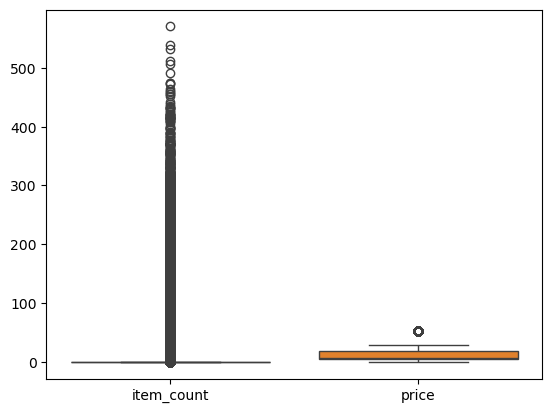

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=sales[['item_count', 'price']])


In [9]:
# Step 1: Merge sales with items on item_id = id
merged_df = pd.merge(sales, items, left_on='item_id', right_on='id', suffixes=('_sales', '_item'))

# Step 2: Merge with restaurants on store_id = id
merged_df = pd.merge(merged_df, restaurants, left_on='store_id', right_on='id', suffixes=('', '_store'))

# Step 3: Select and rename relevant columns
merged_df = merged_df[['date', 'item_id', 'price', 'item_count', 'name', 'kcal', 'store_id', 'name_store']]
merged_df.columns = ['date', 'item_id', 'price', 'item_count', 'item_name', 'kcal', 'store_id', 'store_name']

# Step 4: Convert 'date' to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Step 5: Preview merged data
print(merged_df.head())


        date  item_id  price  item_count                        item_name  \
0 2019-01-01        3  29.22         2.0                Sweet Fruity Cake   
1 2019-01-01        4  26.42        22.0  Amazing Steak Dinner with Rolls   
2 2019-01-01       12   4.87         7.0             Fantastic Sweet Cola   
3 2019-01-01       13   4.18        12.0          Sweet Frozen Soft Drink   
4 2019-01-01       16   3.21       136.0             Frozen Milky Smoothy   

   kcal  store_id   store_name  
0   931         1  Bob's Diner  
1   763         1  Bob's Diner  
2   478         1  Bob's Diner  
3   490         1  Bob's Diner  
4   284         1  Bob's Diner  


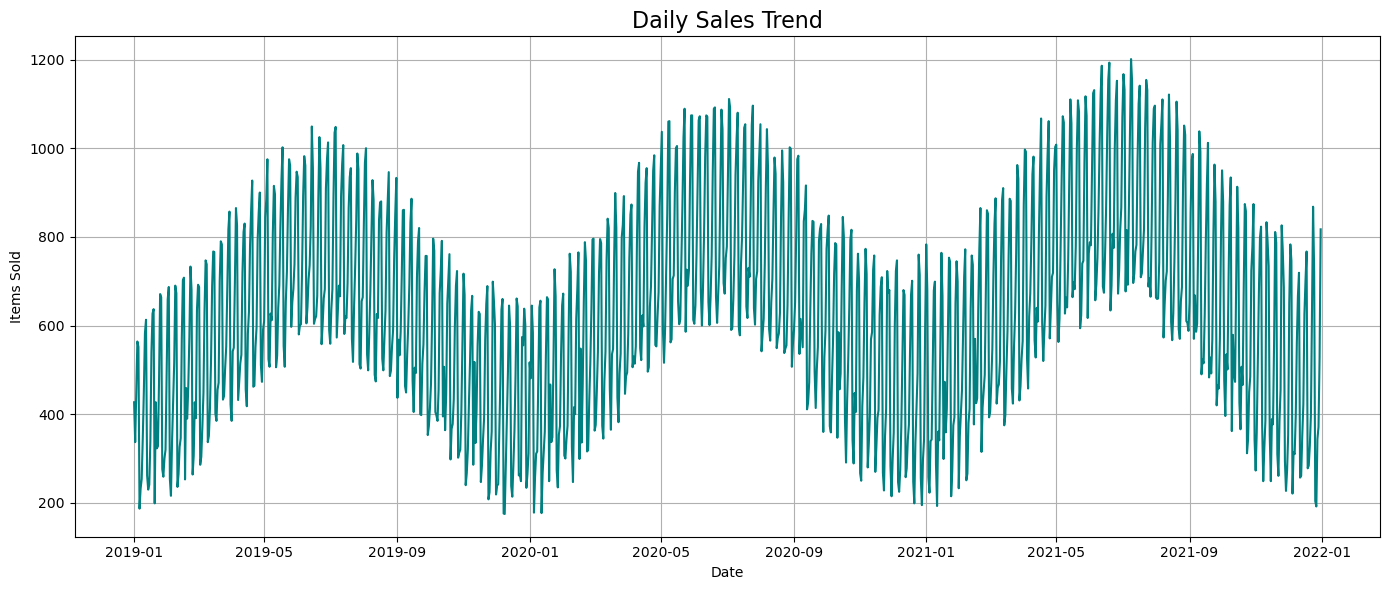

In [12]:
# Group by date and sum item_count
daily_sales = merged_df.groupby('date')['item_count'].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['item_count'], color='teal')
plt.title("Daily Sales Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Items Sold")
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/lt/hqghdcqd5xz980tvxj4txcv00000gn/T/ipykernel_4256/355275119.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")


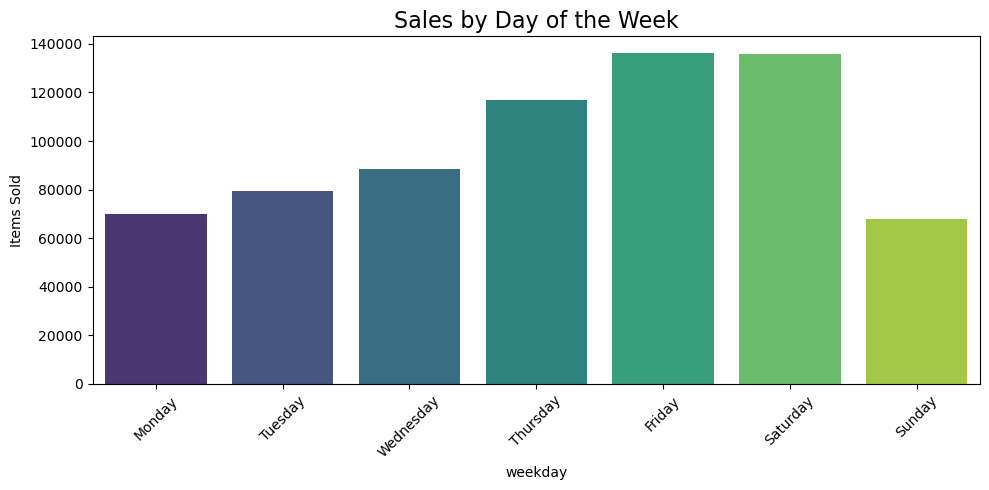

In [14]:
# Add weekday column
merged_df['weekday'] = merged_df['date'].dt.day_name()

# Aggregate sales by weekday
weekday_sales = merged_df.groupby('weekday')['item_count'].sum()

# Ensure correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="viridis")
plt.title("Sales by Day of the Week", fontsize=16)
plt.ylabel("Items Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/lt/hqghdcqd5xz980tvxj4txcv00000gn/T/ipykernel_4256/186530271.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="magma")


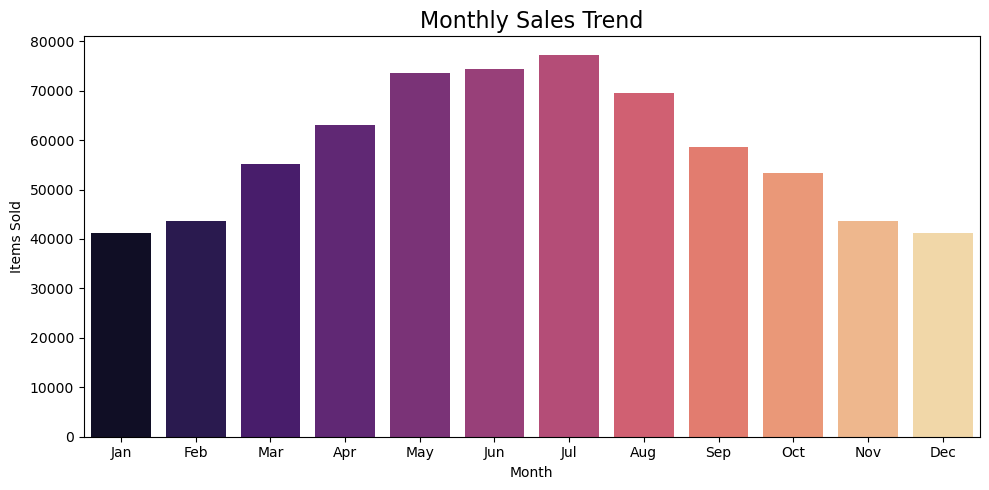

In [16]:
# Extract month from date
merged_df['month'] = merged_df['date'].dt.month

# Group by month
monthly_sales = merged_df.groupby('month')['item_count'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="magma")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Items Sold")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.tight_layout()
plt.show()


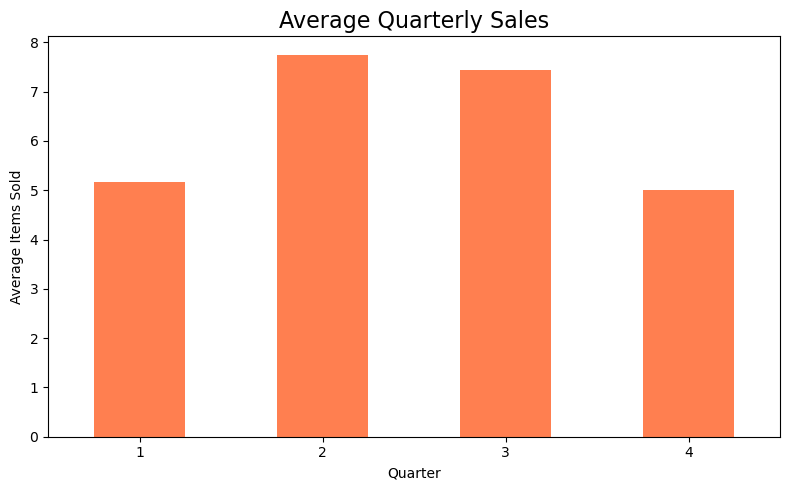

In [18]:
# Create quarter column
merged_df['quarter'] = merged_df['date'].dt.quarter

# Group by quarter
quarterly_sales = merged_df.groupby('quarter')['item_count'].mean()

# Plot
plt.figure(figsize=(8,5))
quarterly_sales.plot(kind='bar', color='coral')
plt.title("Average Quarterly Sales", fontsize=16)
plt.xlabel("Quarter")
plt.ylabel("Average Items Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


/var/folders/lt/hqghdcqd5xz980tvxj4txcv00000gn/T/ipykernel_4256/1249711262.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette="coolwarm")


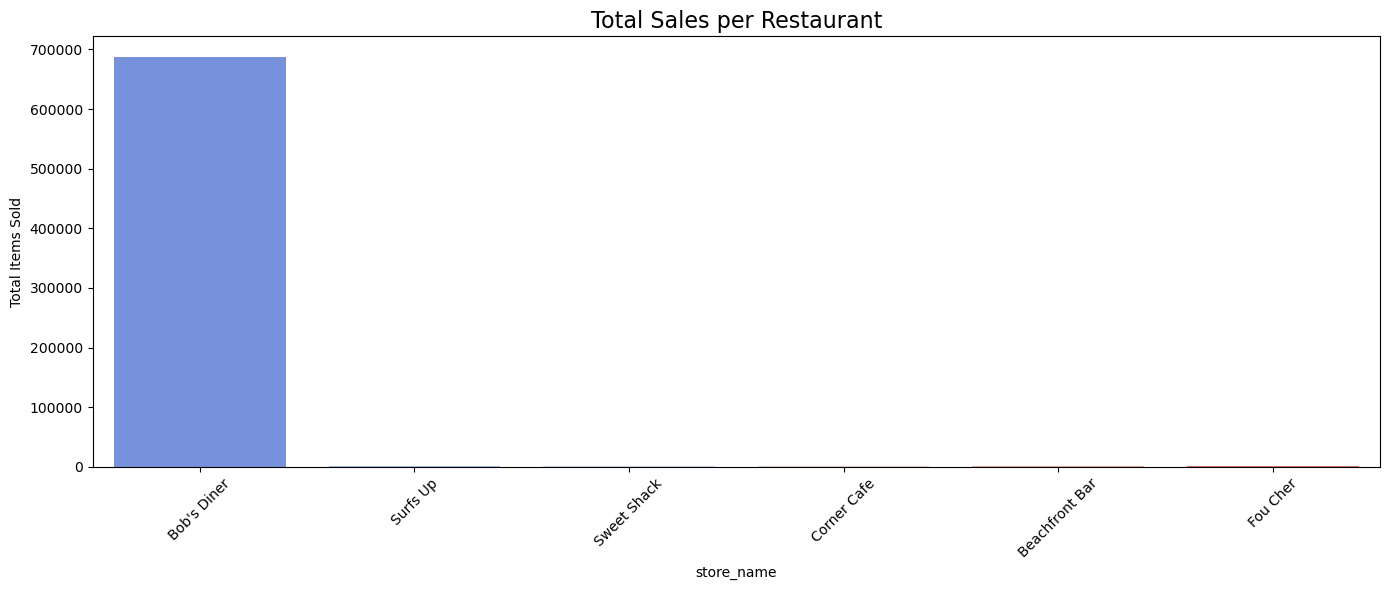

In [20]:
store_sales = merged_df.groupby('store_name')['item_count'].sum().sort_values(ascending=False)

# Barplot
plt.figure(figsize=(14,6))
sns.barplot(x=store_sales.index, y=store_sales.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Total Sales per Restaurant", fontsize=16)
plt.ylabel("Total Items Sold")
plt.tight_layout()
plt.show()


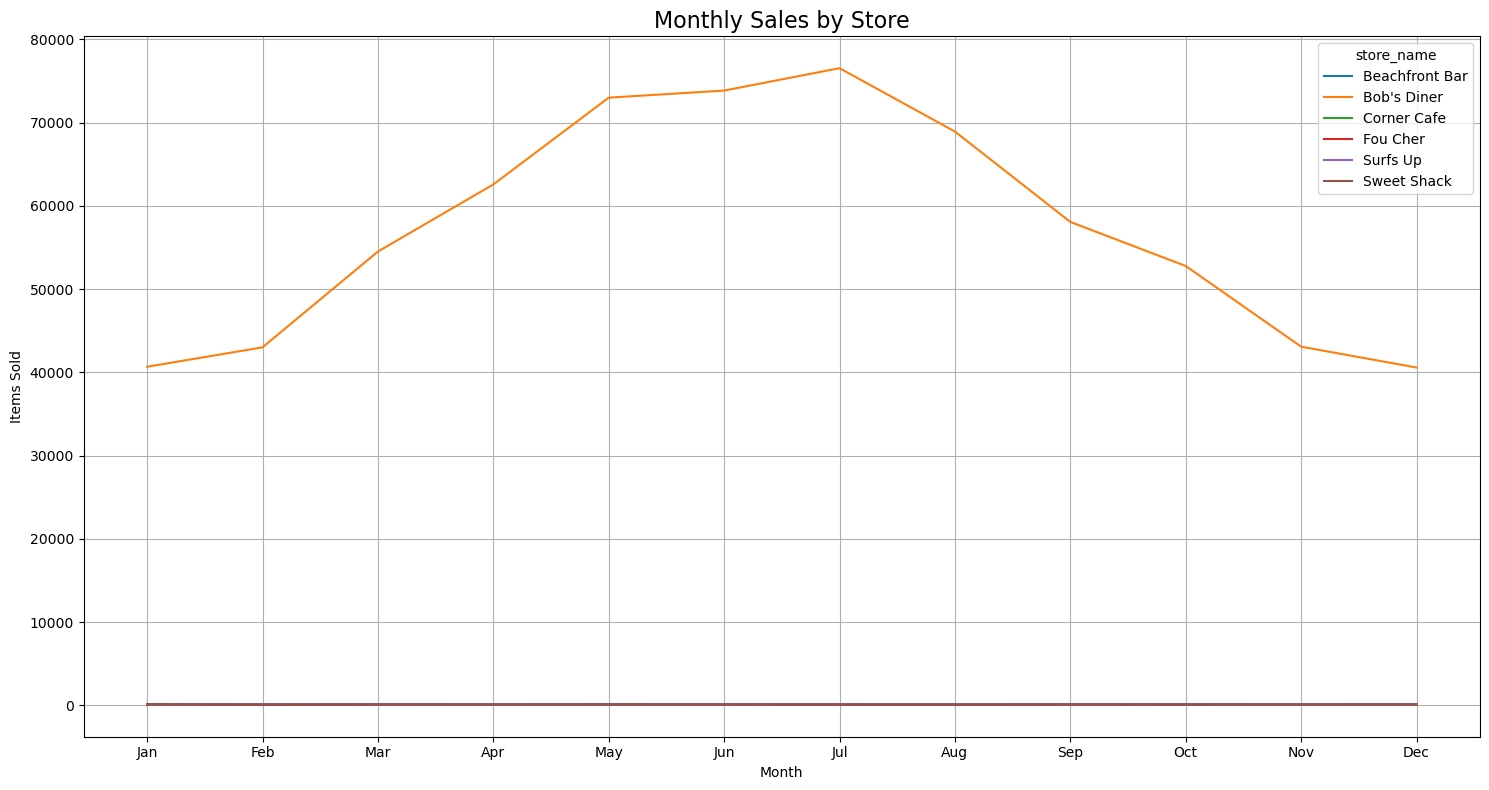

In [22]:
# Extract year
merged_df['year'] = merged_df['date'].dt.year

# Monthly store sales
monthly_store_sales = merged_df.groupby(['store_name', 'month'])['item_count'].sum().unstack()

# Plot
monthly_store_sales.T.plot(figsize=(15,8))
plt.title("Monthly Sales by Store", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Items Sold")
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.tight_layout()
plt.show()


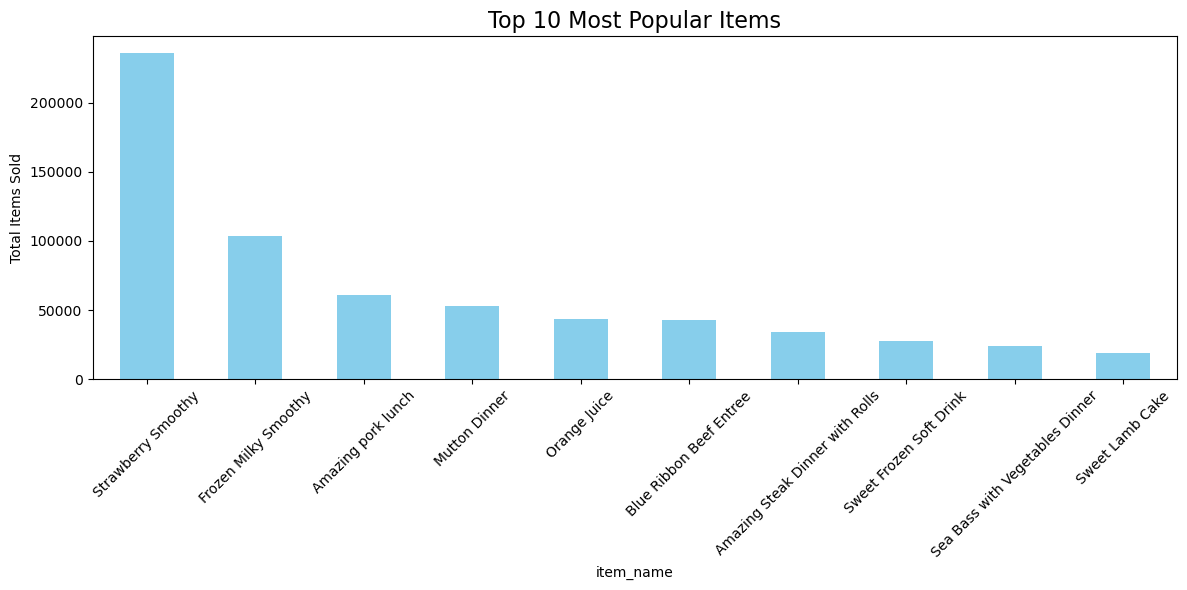

In [24]:
# Group by item_name and sum item_count
top_items = merged_df.groupby('item_name')['item_count'].sum().sort_values(ascending=False)

# Top 10 most sold items
top_items.head(10).plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Top 10 Most Popular Items", fontsize=16)
plt.ylabel("Total Items Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
# Group by store and item, then sum
store_item_sales = merged_df.groupby(['store_name', 'item_name'])['item_count'].sum().reset_index()

# Find the index of the top-selling item per store
top_items_per_store_idx = store_item_sales.groupby('store_name')['item_count'].idxmax()

# Extract rows
top_items_per_store = store_item_sales.loc[top_items_per_store_idx].reset_index(drop=True)
print(top_items_per_store)


       store_name                      item_name  item_count
0  Beachfront Bar        Fantastic Milky Smoothy      1147.0
1     Bob's Diner             Strawberry Smoothy    236337.0
2     Corner Cafe           Frozen Milky Smoothy       273.0
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch       298.0
4        Surfs Up             Awesome Soft Drink       997.0
5     Sweet Shack                Awesome Smoothy      1692.0


In [28]:
merged_df['revenue'] = merged_df['item_count'] * merged_df['price']


In [30]:
# Total revenue
total_revenue_by_store = merged_df.groupby('store_name')['revenue'].sum().sort_values(ascending=False)

# Average daily revenue
daily_revenue = merged_df.groupby(['store_name', 'date'])['revenue'].sum().reset_index()
avg_daily_revenue = daily_revenue.groupby('store_name')['revenue'].mean().sort_values(ascending=False)

# Compare both
comparison_df = pd.DataFrame({
    'Total Revenue': total_revenue_by_store,
    'Average Daily Revenue': avg_daily_revenue
}).sort_values(by='Total Revenue', ascending=False)

print(comparison_df)


                Total Revenue  Average Daily Revenue
store_name                                          
Bob's Diner        6337275.69            5782.185849
Fou Cher             27885.37              25.442856
Corner Cafe          16551.43              15.101670
Surfs Up             15651.49              14.280557
Beachfront Bar        3796.20               3.463686
Sweet Shack           2578.27               2.352436


In [32]:
# Find max priced item per store
store_item_price = merged_df.groupby(['store_name', 'item_name'])[['price', 'kcal']].max().reset_index()

# For each store, get item with highest price
expensive_items_idx = store_item_price.groupby('store_name')['price'].idxmax()

most_expensive_per_store = store_item_price.loc[expensive_items_idx].reset_index(drop=True)

print(most_expensive_per_store)


       store_name                      item_name  price  kcal
0  Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
1     Bob's Diner              Sweet Fruity Cake  29.22   931
2     Corner Cafe                     Pike Lunch  26.37   653
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
4        Surfs Up                     Steak Meal  26.21   607
5     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


In [34]:
# Extract features
merged_df['day'] = merged_df['date'].dt.day
merged_df['month'] = merged_df['date'].dt.month
merged_df['year'] = merged_df['date'].dt.year
merged_df['dayofweek'] = merged_df['date'].dt.dayofweek
merged_df['quarter'] = merged_df['date'].dt.quarter

# Daily total sales
daily_sales_df = merged_df.groupby('date')['item_count'].sum().reset_index()
daily_sales_df.columns = ['date', 'total_sales']

# Create time-based features again
daily_sales_df['day'] = daily_sales_df['date'].dt.day
daily_sales_df['month'] = daily_sales_df['date'].dt.month
daily_sales_df['year'] = daily_sales_df['date'].dt.year
daily_sales_df['dayofweek'] = daily_sales_df['date'].dt.dayofweek
daily_sales_df['quarter'] = daily_sales_df['date'].dt.quarter


In [36]:
# Sort by date
daily_sales_df = daily_sales_df.sort_values('date')

# Split data
split_date = daily_sales_df['date'].max() - pd.DateOffset(months=6)
train = daily_sales_df[daily_sales_df['date'] <= split_date]
test = daily_sales_df[daily_sales_df['date'] > split_date]

# Features and targets
features = ['day', 'month', 'year', 'dayofweek', 'quarter']
X_train = train[features]
y_train = train['total_sales']
X_test = test[features]
y_test = test['total_sales']


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)


Linear Regression RMSE: 246.53517149655474


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)


Random Forest RMSE: 62.15626702898318


In [41]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)


XGBoost RMSE: 61.24730026198405


In [43]:
# Comparison table
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Random Forest RMSE:     {rmse_rf:.2f}")
print(f"XGBoost RMSE:           {rmse_xgb:.2f}")


Linear Regression RMSE: 246.54
Random Forest RMSE:     62.16
XGBoost RMSE:           61.25


In [46]:
# Calculate revenue if not already done
merged_df['revenue'] = merged_df['item_count'] * merged_df['price']

# Create daily total revenue series
daily_revenue = merged_df.groupby('date')['revenue'].sum().reset_index().sort_values('date')

# Normalize revenue for LSTM
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
daily_revenue['scaled_revenue'] = scaler.fit_transform(daily_revenue[['revenue']])


In [48]:
import numpy as np

# Define sequence window
n_input = 30  # past 30 days
n_features = 1

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

# Create sequences
series = daily_revenue['scaled_revenue'].values
X, y = create_sequences(series, n_input)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], n_features))


In [50]:
# Use last 12 months (approx 365 days) for testing
split = int(len(X) * 0.85)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [52]:
pip install tensorflow

/Users/sarthaksrivastava/.zshenv:2: command not found: rbenv
Note: you may need to restart the kernel to use updated packages.


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1684 - val_loss: 0.0399
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 - val_loss: 0.0396
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0299 - val_loss: 0.0416
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - val_loss: 0.0394
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 - val_loss: 0.0441
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - val_loss: 0.0393
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 - val_loss: 0.0450
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0274 - val_loss: 0.0467
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 - val_loss: 0.0445
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0247 - val_loss: 0.0484
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 - val_loss: 0.0310
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0230 - val_loss: 0.0261


In [54]:
# Predictions
y_pred = model.predict(X_test)

# Inverse scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

# MAPE
mape = np.mean(np.abs((y_test_rescaled - y_pred_rescaled) / y_test_rescaled)) * 100
print(f"MAPE: {mape:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
MAPE: 19.85%


In [56]:
future_days = 90
input_seq = series[-n_input:].reshape(1, n_input, 1)

future_preds = []

for _ in range(future_days):
    next_pred = model.predict(input_seq)[0][0]
    future_preds.append(next_pred)
    
    # Append and shift input window
    input_seq = np.append(input_seq[:, 1:, :], [[[next_pred]]], axis=1)

# Rescale predictions back
future_preds_rescaled = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

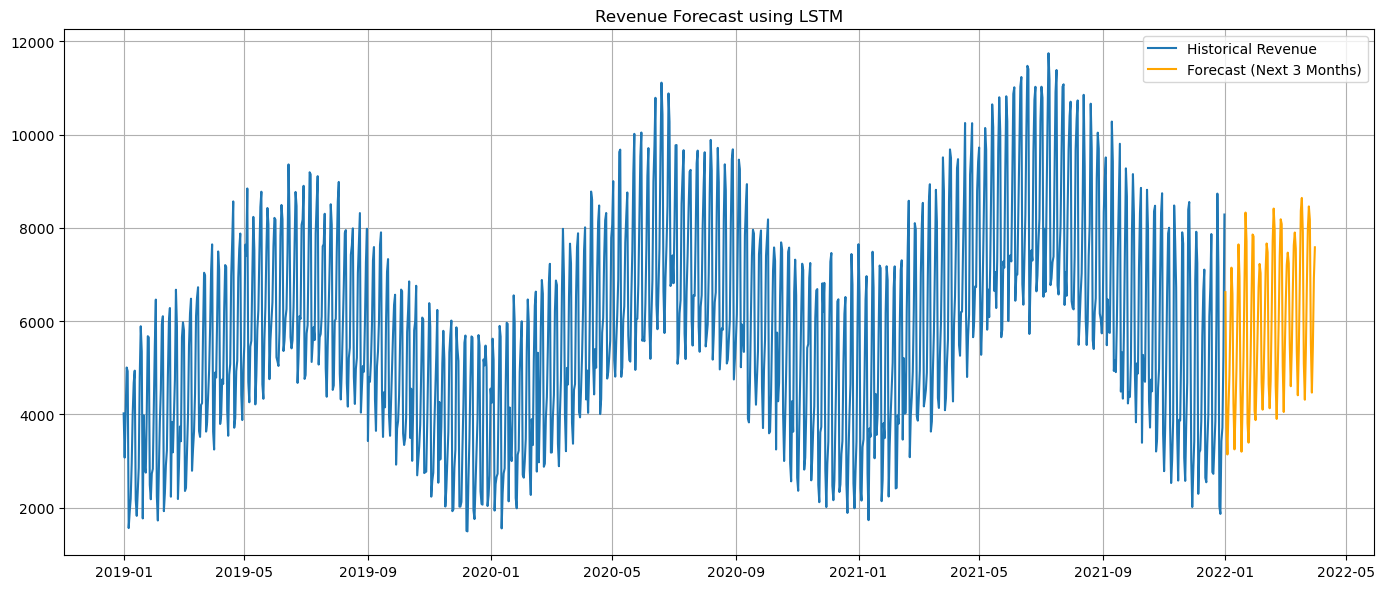

In [57]:
# Plot historical + forecast
dates = pd.date_range(start=daily_revenue['date'].max() + pd.Timedelta(days=1), periods=future_days)

plt.figure(figsize=(14,6))
plt.plot(daily_revenue['date'], daily_revenue['revenue'], label='Historical Revenue')
plt.plot(dates, future_preds_rescaled, label='Forecast (Next 3 Months)', color='orange')
plt.title("Revenue Forecast using LSTM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
